In [2]:
# Load necessary libraries

import os
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
import warnings
warnings.filterwarnings('ignore')

# plotting config
sns.set(style='white', rc={'figure.figsize':(20,10)})

In [3]:
# Upload the dataset from local computer to colab

from google.colab import files
files.upload()

Saving insurance_regression.csv to insurance_regression.csv


{'insurance_regression.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1

In [4]:
insur_df = pd.read_csv('/content/insurance_regression.csv')
insur_df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


# **Total Population**

In [5]:
total_insured = insur_df["sex"].count()
print('Total Population insured: ',total_insured)

Total Population insured:  1338


# **Initial Insight**: 82% of the population is overweight.

In [5]:
total_ow = insur_df['bmi'].between(25, 60).value_counts()
print(total_ow)

True     1093
False     245
Name: bmi, dtype: int64


## Extracting the overweight (BMI >=25) from the population:

In [47]:
df_overweights = insur_df[insur_df['bmi'].between(25, 60)] #get the overweights. NOT YET confirmed if smoker or not
df_overweights

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450


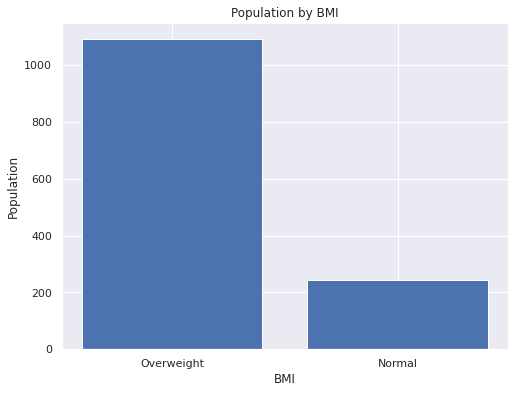

In [46]:
data = [1093, 245] #plot the count of overweight and normal
labels = ['Overweight', 'Normal']
plt.figure(figsize=(8,6))
plt.xticks(range(len(data)), labels)
plt.xlabel('BMI')
plt.ylabel('Population')
plt.title('Population by BMI')
plt.bar(range(len(data)), data) 
plt.show()

# **Next, we'll check on Overweight Smokers and Non-Smokers**

In [17]:
df_smokers = df_overweights[(df_overweights["smoker"]=="yes")] #get the overweight smokers 
df_smokers

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1308,25,female,30.200,0,yes,southwest,33900.65300
1313,19,female,34.700,2,yes,southwest,36397.57600
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


#**Fromthe overweights dataframe, I extracted the OVERWEIGHT SMOKERS (above) and computed the average insurance charge for them**

In [21]:
# 274 out of the entire population are SMOKERS; 219 out of 274 SMOKERS are OVERWEIGHT
total_smokers = (insur_df['smoker']=='yes').value_counts()
print('Total no. of smokers: ',total_smokers)

print('Total Overweight & Smoker: ',len(df_smokers))

total_insuc_ows = df_smokers['charges'].sum()
print(total_insuc_ows)

ave_insur_ows = total_insuc_ows/len(df_smokers) # get the average of the insurance charge/overweight smoker

print('Ave. insurance charge per Overweight Smoker: ',ave_insur_ows)

Total no. of smokers:  False    1064
True      274
Name: smoker, dtype: int64
Total Overweight & Smoker:  218
7646101.816670001
Ave. insurance charge per Overweight Smoker:  35073.8615443578


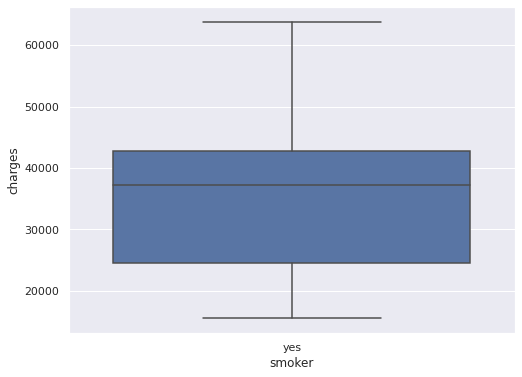

In [41]:
plt.figure(figsize=(8,6))
sns.boxplot(x="smoker", y="charges", data=df_smokers)

##**Still from the overweight dataframe, I extracted the OVERWEIGHT NON-Smokers below:**

In [28]:
df_owns = df_overweights[(df_overweights["smoker"]=="no")] #get the overweight NON-smokers 
df_owns

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620
4,32,male,28.88,0,no,northwest,3866.8552
5,31,female,25.74,0,no,southeast,3756.6216
6,46,female,33.44,1,no,southeast,8240.5896
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,no,southwest,11411.6850
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335


In [29]:
print('Total no. of Overweight NON-smokers: ',len(df_owns))

total_insuc = df_owns['charges'].sum()
print(total_insuc)

ave_insur_ns = sum(df_owns['charges'])/len(df_owns)
print('Ave. insurance charge per non-smoker: ',ave_insur_ns)


Total no. of Overweight NON-smokers:  872
7542475.261769
Ave. insurance charge per non-smoker:  8649.62759377178


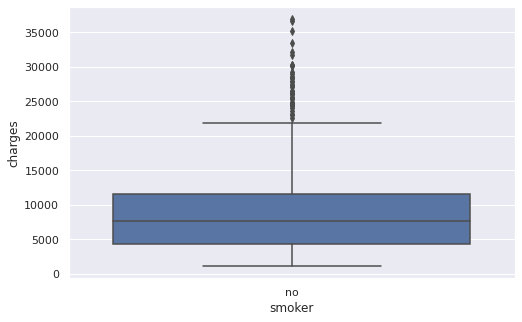

In [48]:
plt.figure(figsize=(8,5))
sns.boxplot(x="smoker", y="charges", data=df_owns)

##**Insights Derived: Overweight SMOKERS pay 4x the amount of average insurance charge for Overweight NON-SMOKERS**
###**Average Insurance Charge:**
A Smoker pays = 35116.91 while a NON-Smoker: 8633.96 as you can see on the box plot below:

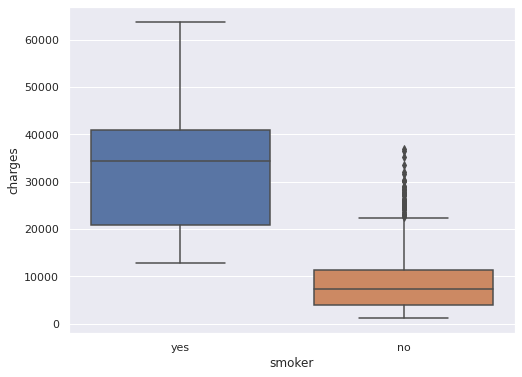

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(x="smoker", y="charges", data=insur_df)